## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Load data

In [8]:
data_df = pd.read_csv('Folds5x2_pp.csv', sep=';')
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Column description:
 - AT - Temperature in the range 1.81°C and 37.11°C (feature),
 - V - Exhaust Vacuum in teh range 25.36-81.56 cm Hg (feature),
 - AP - Ambient Pressure in the range 992.89-1033.30 milibar (feature),
 - RH - Relative Humidity in the range 25.56% to 100.16% (feature),
 - EP - Net hourly electrical energy output 420.26-495.76 MW (target)

## Divide features and target

In [10]:
X = data_df.drop(['PE'], axis = 1).values # transform DataFrame to numpy array
Y = data_df['PE'].values

In [14]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [15]:
print(Y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


## Split data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Train the model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Test the model

In [19]:
from sklearn.metrics import r2_score

Y_predict = model.predict(X_test)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(Y_predict - Y_test)))
print("Mean Squared Erroe: %.2f" % np.mean((Y_predict - Y_test)**2))
print("R2-score: %.2f" % r2_score(Y_predict, Y_test))

Mean Absolute Error: 3.56
Mean Squared Erroe: 19.83
R2-score: 0.93


In [33]:
predicted_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict, 'Difference': Y_test - Y_predict, '%': (Y_test - Y_predict)/Y_test})
predicted_df.head(20)

,Actual,Predicted,Difference,%
0,431.23,431.434590,-0.204590,-0.000474
1,460.01,458.575229,1.434771,0.003119
2,461.14,462.766049,-1.626049,-0.003526
3,445.90,448.606498,-2.706498,-0.006070
4,451.29,457.876052,-6.586052,-0.014594
5,432.68,429.708956,2.971044,0.006867
6,477.50,473.033008,4.466992,0.009355
7,459.68,456.519250,3.160750,0.006876
8,477.50,474.337425,3.162575,0.006623
9,444.99,446.362429,-1.372429,-0.003084


## Vizualize the result

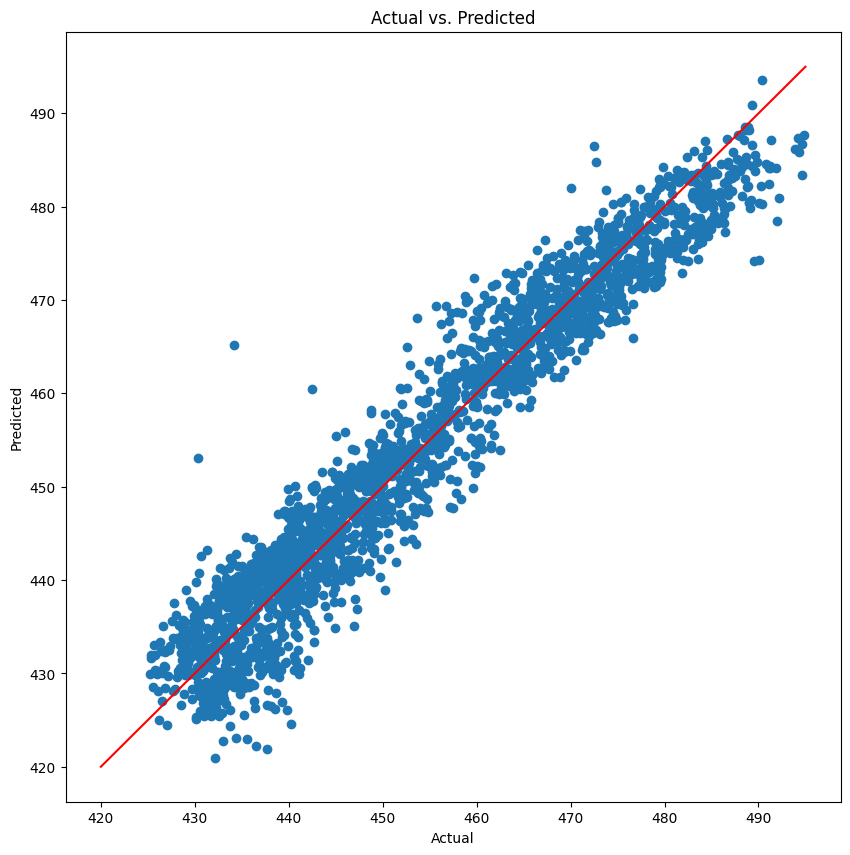

In [30]:
import matplotlib.pyplot as plt

# prepare data for the graph y = x
x_values = [420, 495]
y_values = [420, 495]

plt.figure(figsize = (10, 10))
plt.scatter(Y_test, Y_predict)

# draw graph y = x
plt.plot(x_values, y_values, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

plt.show()

## Make prediction for new data

In [20]:
new_data = np.array([[25.18, 62.96, 1020.04, 59.08]])
prediction = model.predict(new_data)

print("Features: ", new_data)
print("Prediction: %.2f" % prediction)

Features:  [[  25.18   62.96 1020.04   59.08]]
Prediction: 444.11
